<a href="https://colab.research.google.com/github/erickunix/slm/blob/main/betterversionslm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Installing of libraries and Importing Dataset to Colab**

In [ ]:
!pip install csaps
!pip install pygam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import math
from scipy import stats
from scipy.interpolate import interp1d
import csaps
import copy
import statsmodels.api as sm
from pygam import LogisticGAM, l, s, f
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **Mounting Gdrive to Colab**

In [ ]:
!git clone https://github.com/erickunix/slm.git

fatal: destination path 'slm' already exists and is not an empty directory.


# **Importing Dataset to Colab**

In [ ]:
df = pd.read_csv('/content/slm/bank-additional/bank-additional-full.csv', sep = ';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Change Name and Value of our target [Cloumn 21 - y - has the client subscribed a term deposit? (binary: 'yes','no']**

In [ ]:
df['deposit'] = df['y'].replace({'yes': 1, 'no': 0})
df =  df.drop(['y'], axis = 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# **2. Data Analysis/Exploration**

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
print(" Number of Rows {rows} ".format(rows = len(df)))

 Number of Rows 41188 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# **Number of Missing values in any Column**

In [ ]:
missing_values = df.isnull().sum()
missing_values.sum()

0

# ****

In [ ]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column      value                      
contact     telephone             15044
            cellular              26144
day_of_week fri                    7827
            tue                    8090
            wed                    8134
            mon                    8514
            thu                    8623
default     yes                       3
            unknown                8597
            no                    32588
education   illiterate               18
            unknown                1731
            basic.6y               2292
            basic.4y               4176
            professional.course    5243
            basic.9y               6045
            high.school            9515
            university.degree     12168
housing     unknown                 990
            no                    18622
            yes                   21576
job         unknown                 330
            student                 875
            unemployed             1014
            housemaid              1060
            self-employed          1421
            entrepreneur           1456
            retired                1720
            management             2924
            services               3969
            technician             6743
            blue-collar            9254
            admin.                10422
loan        unknown                 990
            yes                    6248
            no                    33950
marital     unknown                  80
            divorced               4612
            single                11568
            married               24928
month       dec                     182
            mar                     546
            sep                     570
            oct                     718
            apr                    2632
            nov                    4101
            jun                    5318
            aug                    6178
            jul                    7174
            may                   13769
poutcome    success                1373
            failure                4252
            nonexistent           35563

In [ ]:
test = pd.value_counts(df.job)
test

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
test = pd.value_counts(df.education)
un = pd.Series({'nunique': len(test), 'unique values': test.index.tolist()})
test.append(un)


university.degree                                                  12168
high.school                                                         9515
basic.9y                                                            6045
professional.course                                                 5243
basic.4y                                                            4176
basic.6y                                                            2292
unknown                                                             1731
illiterate                                                            18
nunique                                                                8
unique values          [university.degree, high.school, basic.9y, pro...
dtype: object

In [ ]:
onnum =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
for cat_column in onnum:
 value_counts = df[onnum].value_counts()

In [ ]:
value_counts

job          marital   education            default  housing  loan     contact    month  poutcome   
admin.       married   university.degree    no       yes      no       cellular   aug    nonexistent    255
             single    university.degree    no       yes      no       cellular   aug    nonexistent    229
             married   university.degree    no       no       no       cellular   aug    nonexistent    212
             single    university.degree    no       no       no       cellular   aug    nonexistent    188
blue-collar  married   basic.9y             no       no       no       telephone  may    nonexistent    174
                                                                                                       ... 
management   married   high.school          no       unknown  unknown  cellular   apr    failure          1
                                                                                  may    failure          1
                                   

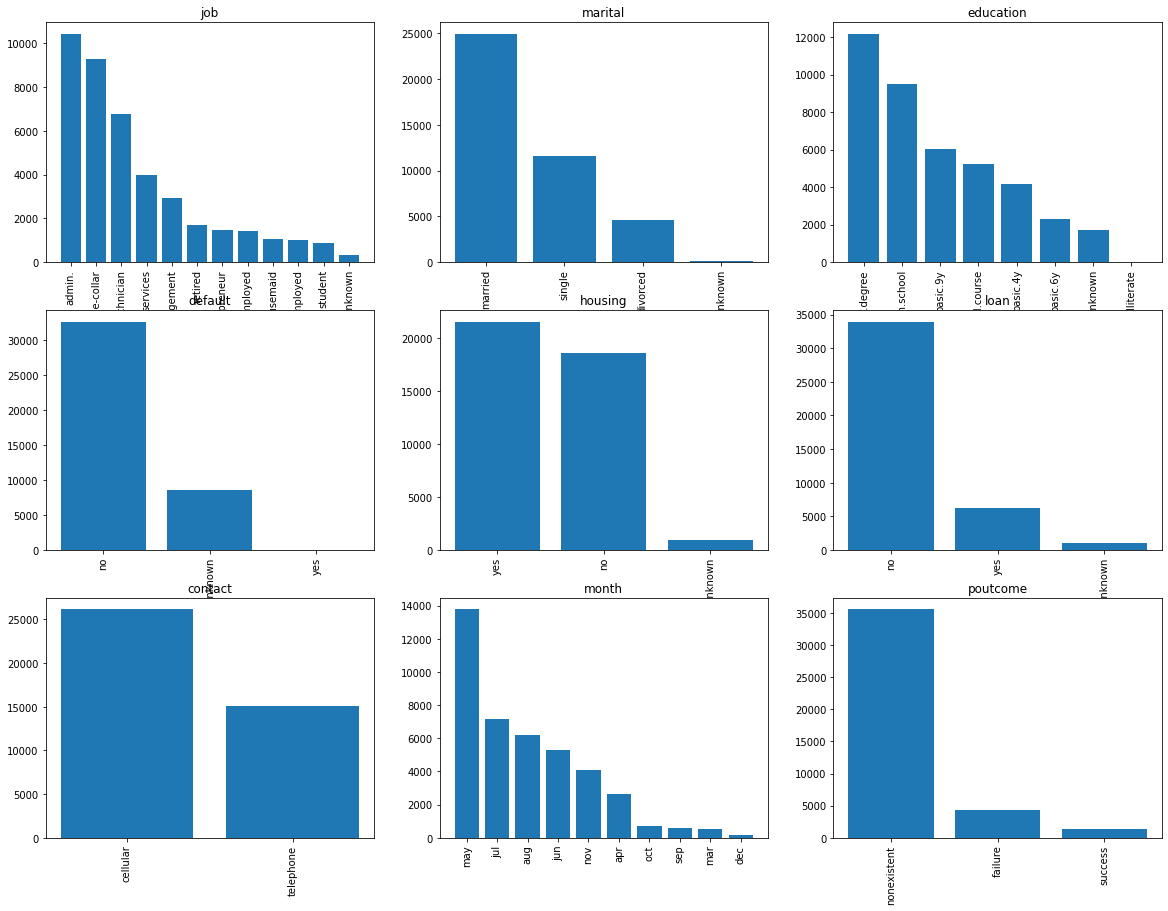

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

# One hot encoding


In [ ]:
df['job'] = df['job'].replace({'housemaid':0, 'services':1, 'admin.':2, 'blue-collar':3, 'technician':4,
       'retired':5, 'management':6, 'unemployed':7, 'self-employed':8, 'unknown':9,
       'entrepreneur':10, 'student':11})

In [ ]:
df['marital'] = df['marital'].replace({'married':0, 'single':1, 'divorced':2, 'unknown':3})

In [ ]:
df['education'] = df['education'].replace({'basic.4y':0, 'high.school':1, 'basic.6y':2, 'basic.9y':3,
       'professional.course':4, 'unknown':5, 'university.degree':6,
       'illiterate':7})

In [ ]:
df['default'] = df['default'].replace({'no':0, 'unknown':1, 'yes':2})

In [ ]:
df['housing'] = df['housing'].replace({'no':0, 'unknown':1, 'yes':2})

In [ ]:
df['loan'] = df['loan'].replace({'no':0, 'unknown':1, 'yes':2})

In [ ]:
df['contact'] = df['contact'].replace({'telephone':0, 'cellular':1})

In [ ]:
df['month'] = df['month'].replace({'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'mar':7, 'apr':8,
       'sep':9})

In [ ]:
df['poutcome'] = df['poutcome'].replace({'nonexistent':0, 'failure':1, 'success':2})

In [ ]:
df['day_of_week'] = df['day_of_week'].replace({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})

# Outliers


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [ ]:
non_cat_columns = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

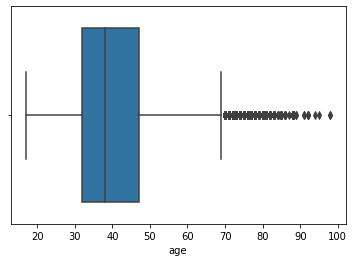

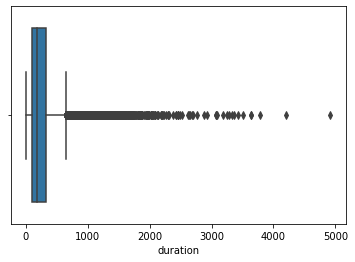

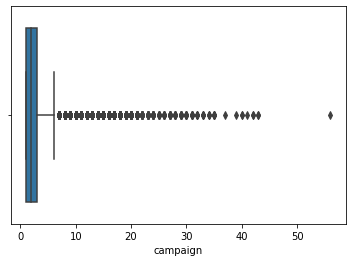

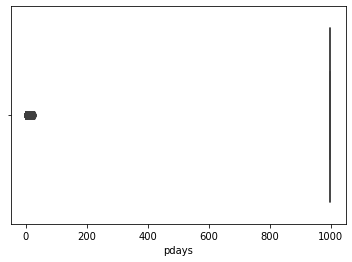

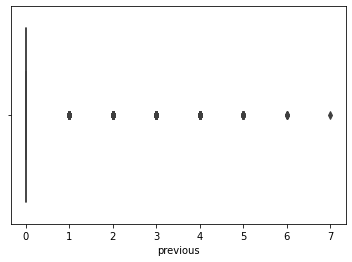

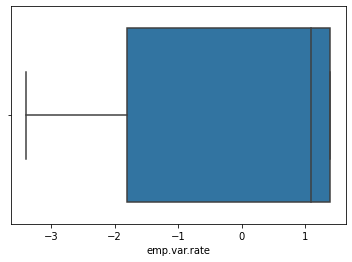

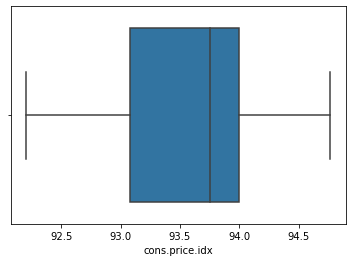

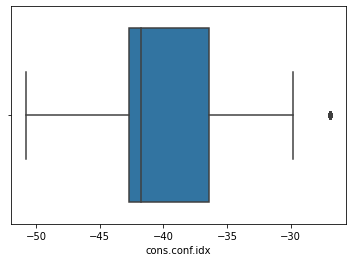

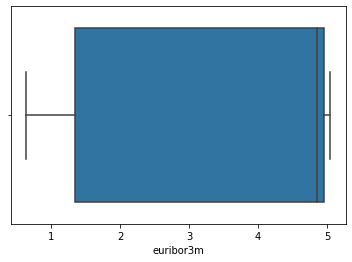

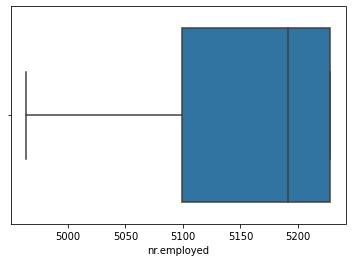

In [ ]:
for col in non_cat_columns:
  plt.figure()
  sns.boxplot(x = df[col])

In [ ]:
for col in non_cat_columns:   
  df.loc[(np.abs(stats.zscore(df[col])) > 3), col] = np.nan
  median = df[col].dropna().median()
  df[col].fillna(median,inplace=True)

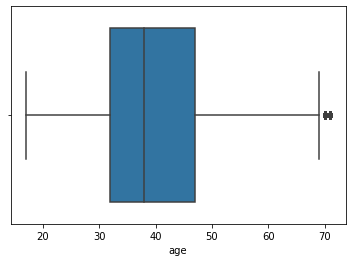

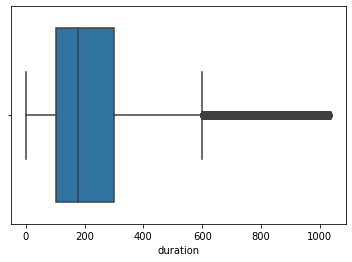

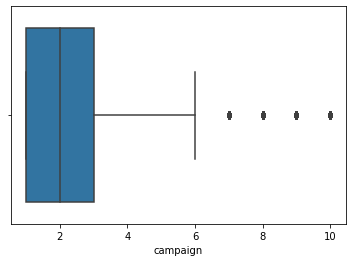

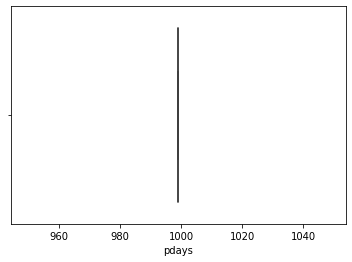

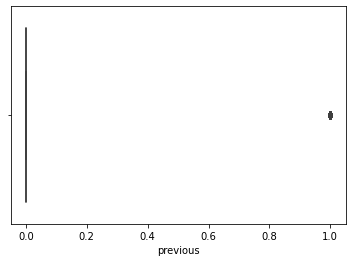

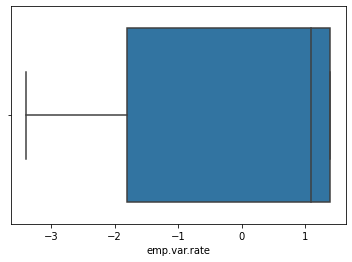

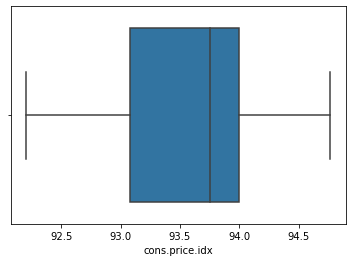

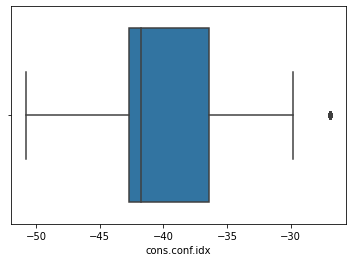

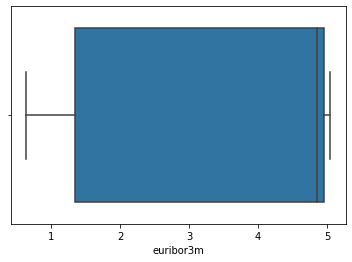

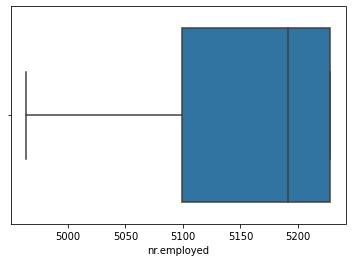

In [ ]:
for col in non_cat_columns:
  plt.figure()
  sns.boxplot(x = df[col])

# Clusterizations and dimensionality reduction techniques


In [ ]:
from sklearn.cluster import KMeans

X = df.drop('deposit', axis = 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data split, standarization and models 


In [ ]:
from sklearn import preprocessing, model_selection

X = df.drop('deposit', axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.9040497232203555

In [ ]:
from sklearn.ensemble import RandomForestClassifier


pipe = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(max_depth=10, random_state=0))
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)


0.9127901330484607

In [ ]:
from sklearn.naive_bayes import GaussianNB

pipe = make_pipeline(preprocessing.StandardScaler(), GaussianNB())
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.7992619209478489

In [ ]:
from sklearn import svm

pipe = make_pipeline(preprocessing.StandardScaler(), svm.SVC())
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.9082256968048946